## Import Libararies <a id='import'>

In [165]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Data Collection And Statical Analysis <a id='data-collection-and-statical-analysis'>

<table style="width: 100%; border-collapse: collapse;">
  <thead>
    <tr>
      <th style="min-width: 10px; width: 30px; background-color: #333333; color: white; font-weight: bold; text-align: left; padding: 8px;">No</th>
      <th style="background-color: #333333; color: white; font-weight: bold; text-align: left; padding: 8px;">Column Name</th>
      <th style="background-color: #333333; color: white; font-weight: bold; text-align: left; padding: 8px;">Meaning</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: white; text-align: left;">1</td>
      <td style="font-weight: bold; font-size: 14px; color: #a92ad4; text-align: left;">Pregnancies</td>
      <td style="font-size: 14px; text-align: left;">Number of pregnancies</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: white; text-align: left;">2</td>
      <td style="font-weight: bold; font-size: 14px; color: #a92ad4; text-align: left;">Glucose</td>
      <td style="font-size: 14px; text-align: left;">Glucose level in blood</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: white; text-align: left;">3</td>
      <td style="font-weight: bold; font-size: 14px; color: #a92ad4; text-align: left;">BloodPressure</td>
      <td style="font-size: 14px; text-align: left;">Blood pressure measurement</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: white; text-align: left;">4</td>
      <td style="font-weight: bold; font-size: 14px; color: #a92ad4; text-align: left;">SkinThickness</td>
      <td style="font-size: 14px; text-align: left;">Thickness of the skin</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: white; text-align: left;">5</td>
      <td style="font-weight: bold; font-size: 14px; color: #a92ad4; text-align: left;">Insulin</td>
      <td style="font-size: 14px; text-align: left;">Insulin level in blood</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: white; text-align: left;">6</td>
      <td style="font-weight: bold; font-size: 14px; color: #a92ad4; text-align: left;">BMI</td>
      <td style="font-size: 14px; text-align: left;">Body mass index</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: white; text-align: left;">7</td>
      <td style="font-weight: bold; font-size: 14px; color: #a92ad4; text-align: left;">DiabetesPedigreeFunction</td>
      <td style="font-size: 14px; text-align: left;">Diabetes percentage</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: white; text-align: left;">8</td>
      <td style="font-weight: bold; font-size: 14px; color: #a92ad4; text-align: left;">Age</td>
      <td style="font-size: 14px; text-align: left;">Age</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: white; text-align: left;">9</td>
      <td style="font-weight: bold; font-size: 14px; color: #a92ad4; text-align: left;">Outcome</td>
      <td style="font-size: 14px; text-align: left;">Final result (<font color="#008000">1</font>: Yes, the individual has diabetes; <font color="#FF0000">0</font>: No, the individual does not have diabetes)</td>
    </tr>
  </tbody>
</table>


In [166]:
#import the dataset
diabetes_prediction = pd.read_csv("./diabetes.csv")
diabetes_prediction.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [167]:
diabetes_prediction.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [168]:
print("0-> Non-Diabetic")
print("1-> Diabetic")
print(diabetes_prediction['Outcome'].value_counts())

0-> Non-Diabetic
1-> Diabetic
0    500
1    268
Name: Outcome, dtype: int64


In [169]:
diabetes_prediction.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

In [170]:
#Dataset info
diabetes_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data Cleaning <a id='data-cleaning'>

In [171]:
#check for null values 
diabetes_prediction.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [172]:
#Duplicate handling
duplicate_rows_data = diabetes_prediction[diabetes_prediction.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 9)


In [173]:
diabetes_prediction = diabetes_prediction.drop_duplicates()

In [174]:
#search for the unique values in every column
for column in diabetes_prediction.columns:
    num_distinct_values = len(diabetes_prediction[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Pregnancies: 17 distinct values
Glucose: 136 distinct values
BloodPressure: 47 distinct values
SkinThickness: 51 distinct values
Insulin: 186 distinct values
BMI: 248 distinct values
DiabetesPedigreeFunction: 517 distinct values
Age: 52 distinct values
Outcome: 2 distinct values


In [175]:

print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35      0.0  33.6   
1              1       85             66             29      0.0  26.6   
2              8      183             64              0      0.0  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27      0.0  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60              0      0.0  30.1   
767            1       93             70             31      0.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


## Data visualization <a id='data-visualization'>

**Univariate Exploration**

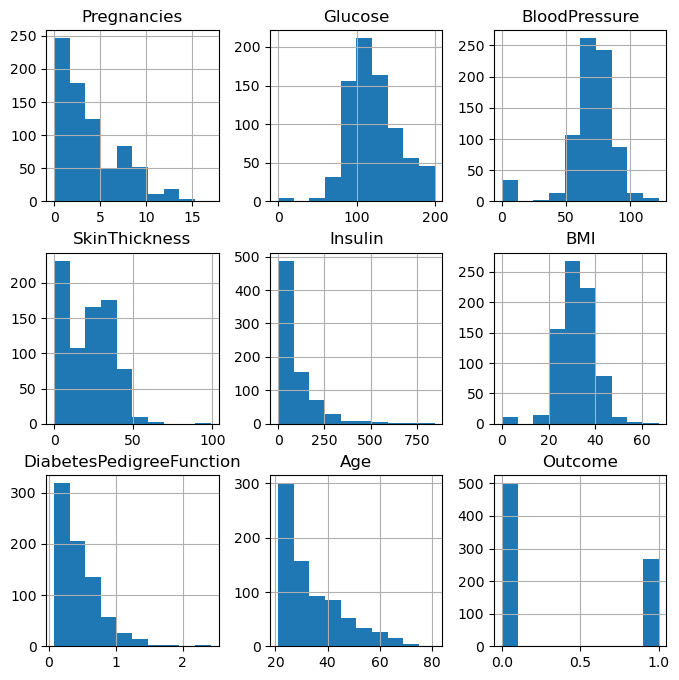

In [176]:
#Dataset histogram
diabetes_prediction.hist(figsize = (8,8))
plt.show()

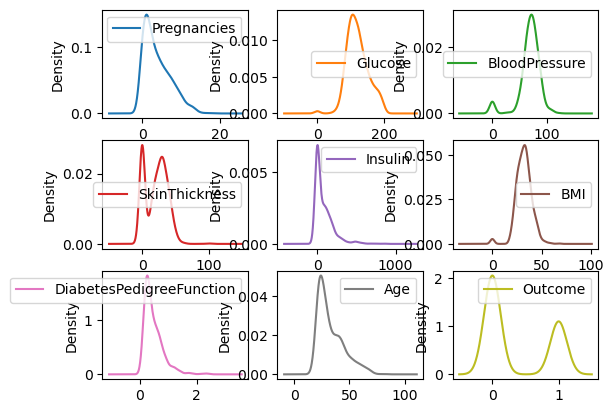

In [177]:
#Dataset plot
diabetes_prediction.plot(kind="density", subplots=True, layout=(3,3), sharex=False)
plt.show()

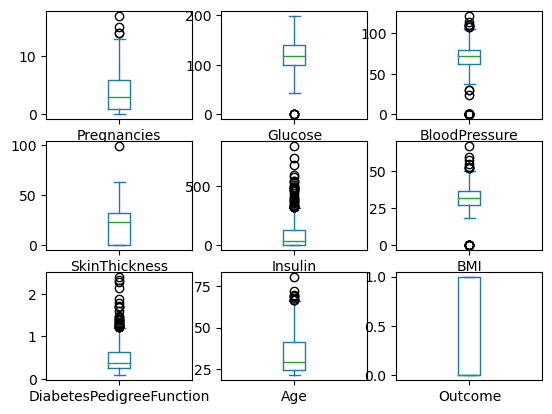

In [178]:
diabetes_prediction.plot(kind="box", subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

**Bivariate Exploration**

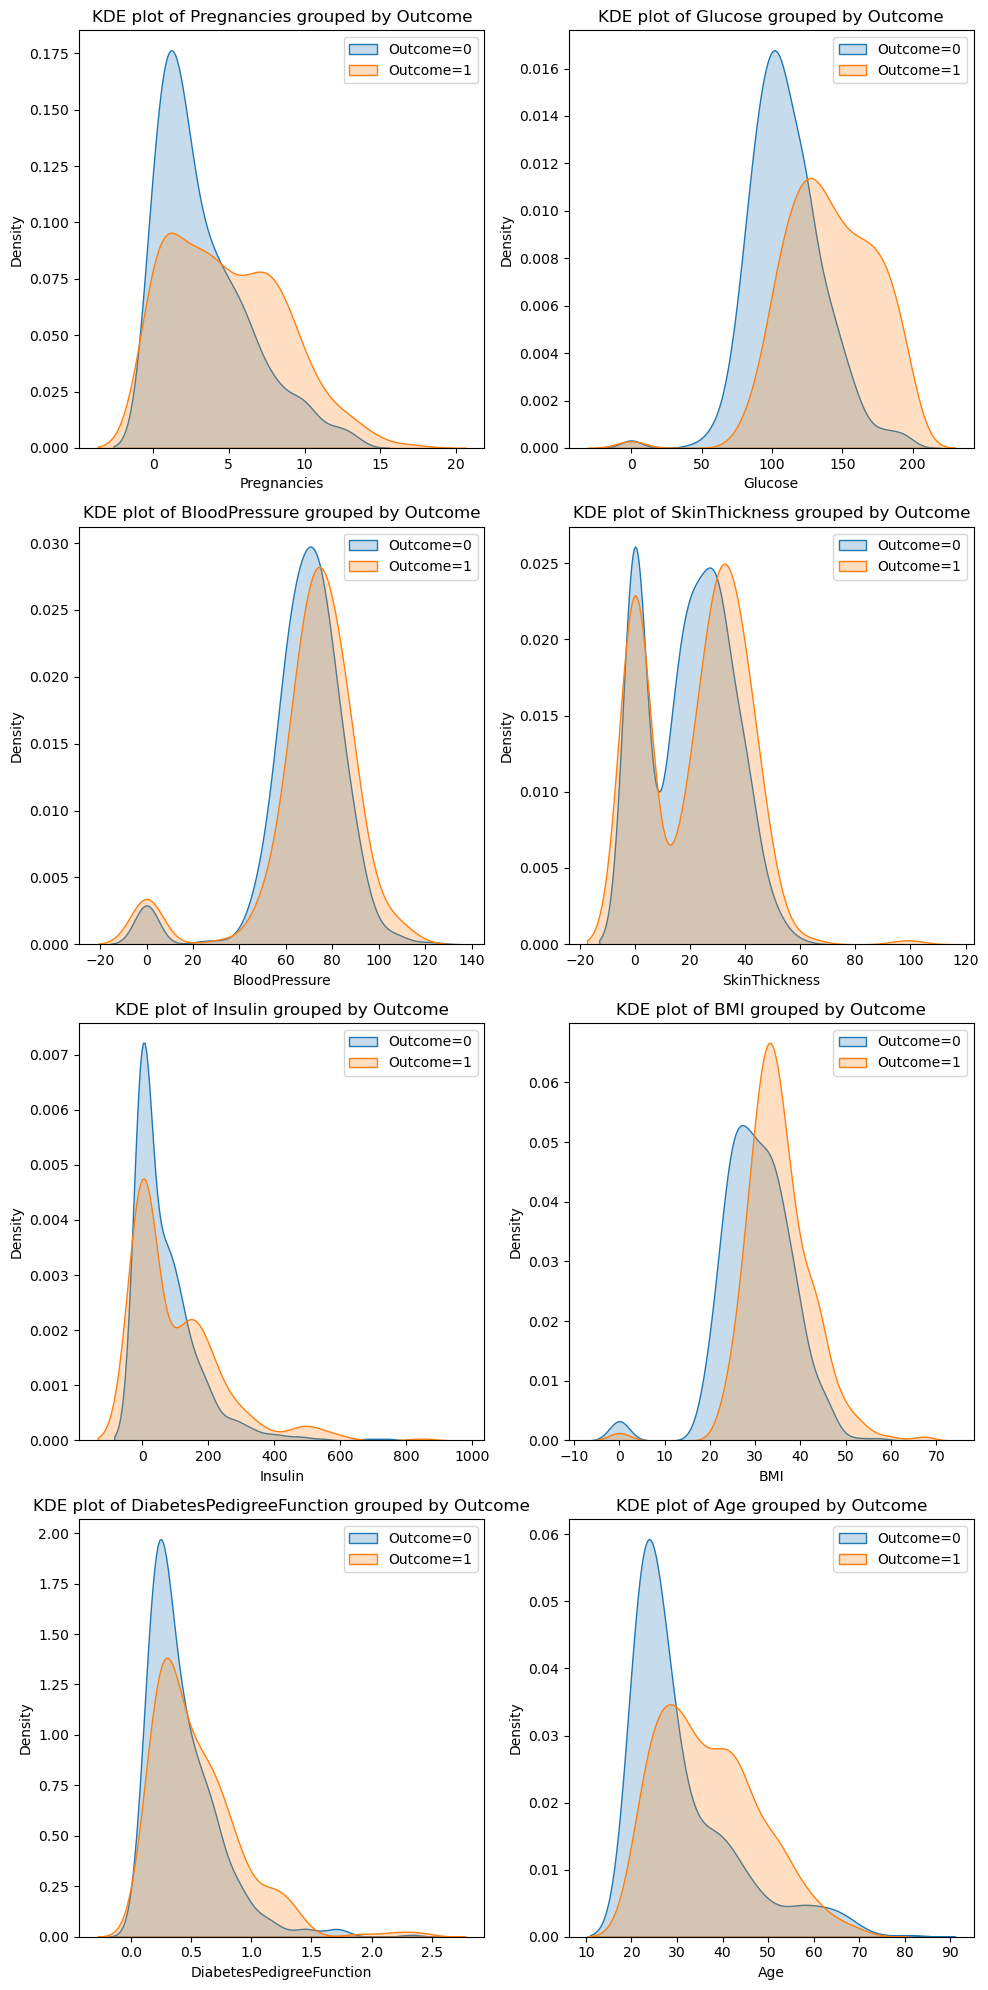

In [179]:
#plot for each variable grouped by the Outcome
num_columns = len(diabetes_prediction.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(diabetes_prediction.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=diabetes_prediction[diabetes_prediction['Outcome']==0][column], label='Outcome=0', fill=True)
    sns.kdeplot(data=diabetes_prediction[diabetes_prediction['Outcome']==1][column], label='Outcome=1', fill=True)
    plt.title(f'KDE plot of {column} grouped by Outcome')
    plt.legend()

plt.tight_layout()
plt.show()

**Multivariate Exploration**

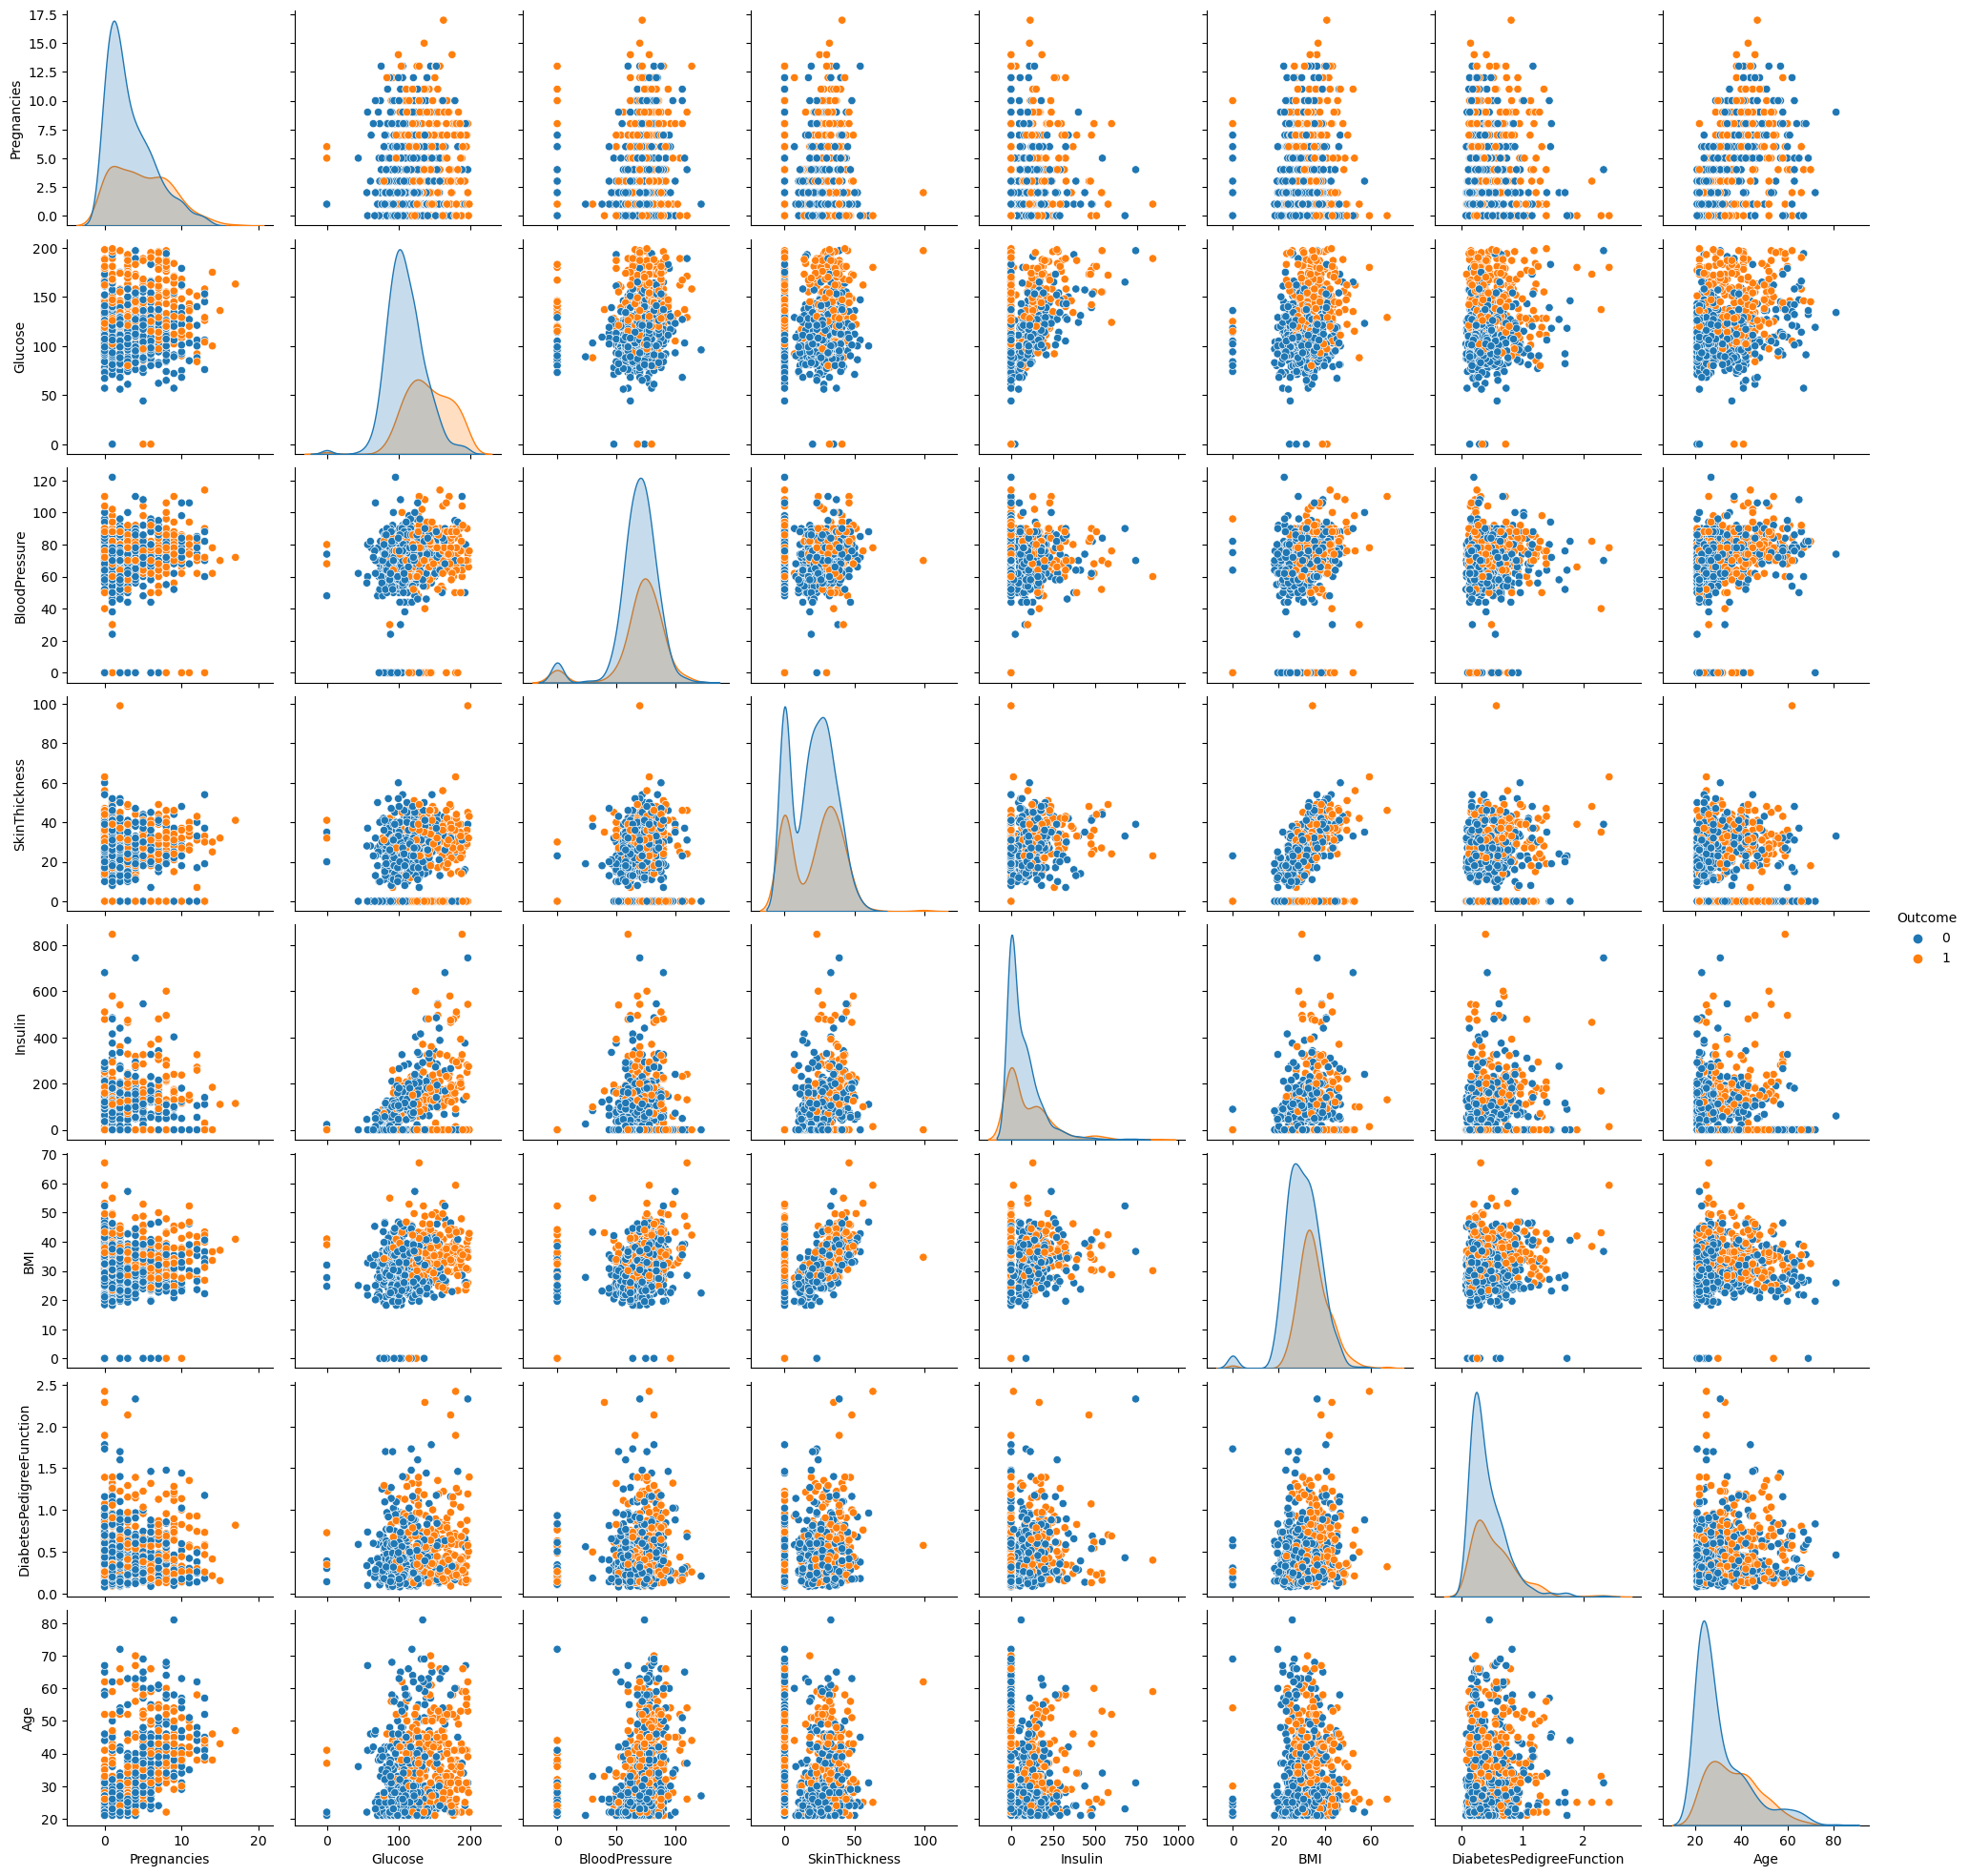

In [180]:
sns.pairplot(diabetes_prediction, hue='Outcome')
plt.show()

In [181]:
g = sns.PairGrid(diabetes_prediction, hue='Outcome')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, kde=True)
plt.show()

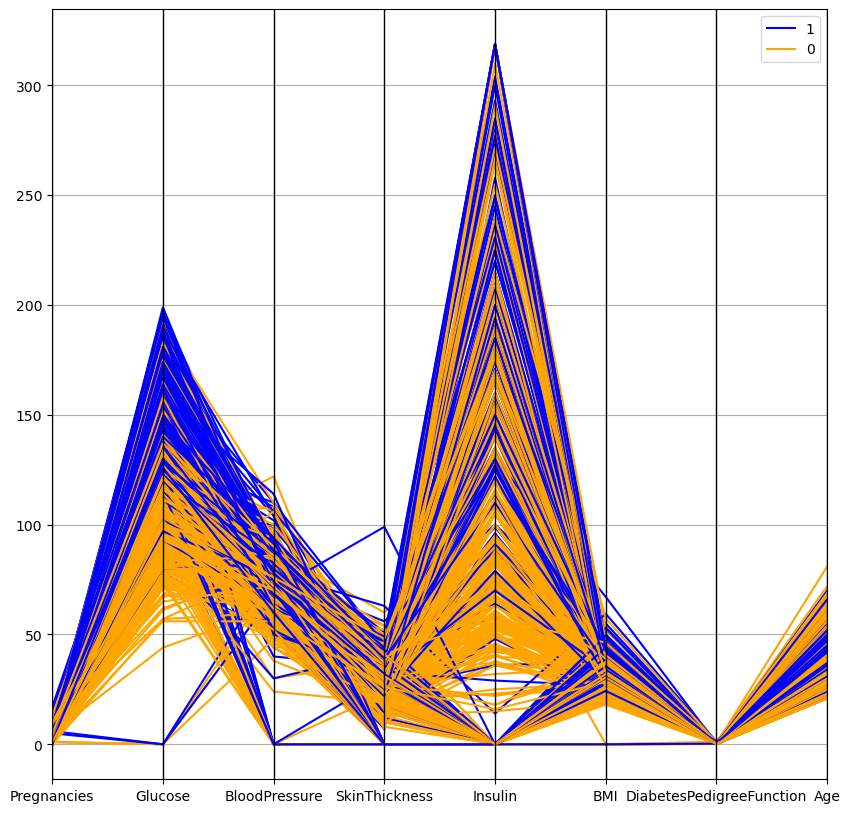

In [ ]:
plt.figure(figsize=(10,10))
parallel_coordinates(diabetes_prediction, 'Outcome', color=['blue', 'orange'])
plt.show()

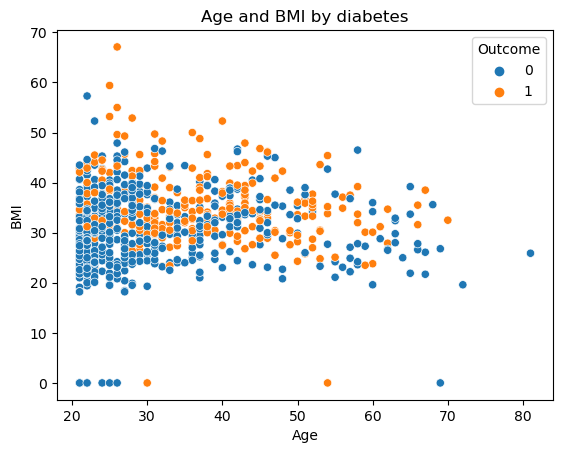

In [ ]:
sns.scatterplot(x='Age', y='BMI', hue='Outcome', data=diabetes_prediction)
plt.title('Age and BMI by diabetes')
plt.show()

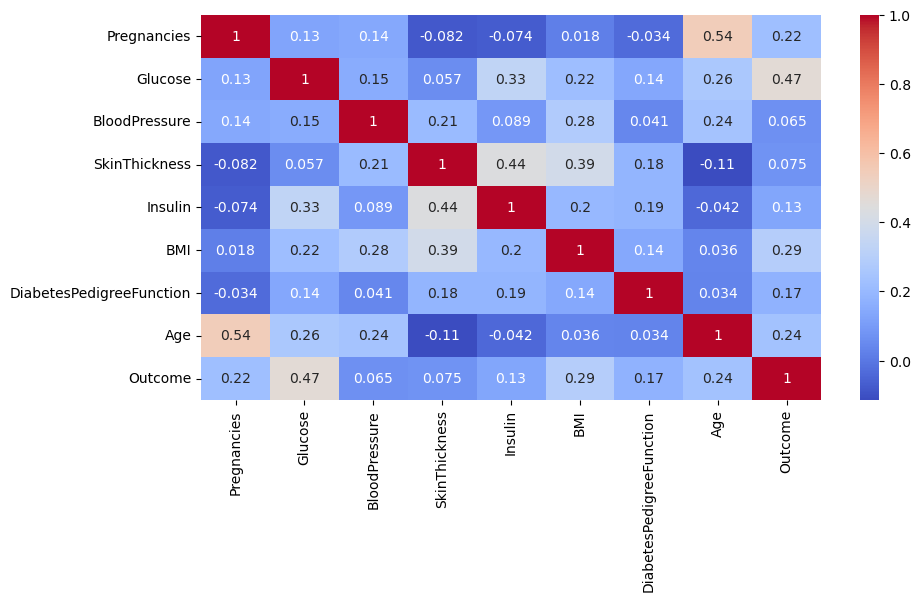

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(diabetes_prediction.corr(), annot=True, cmap="coolwarm");

<Axes: >

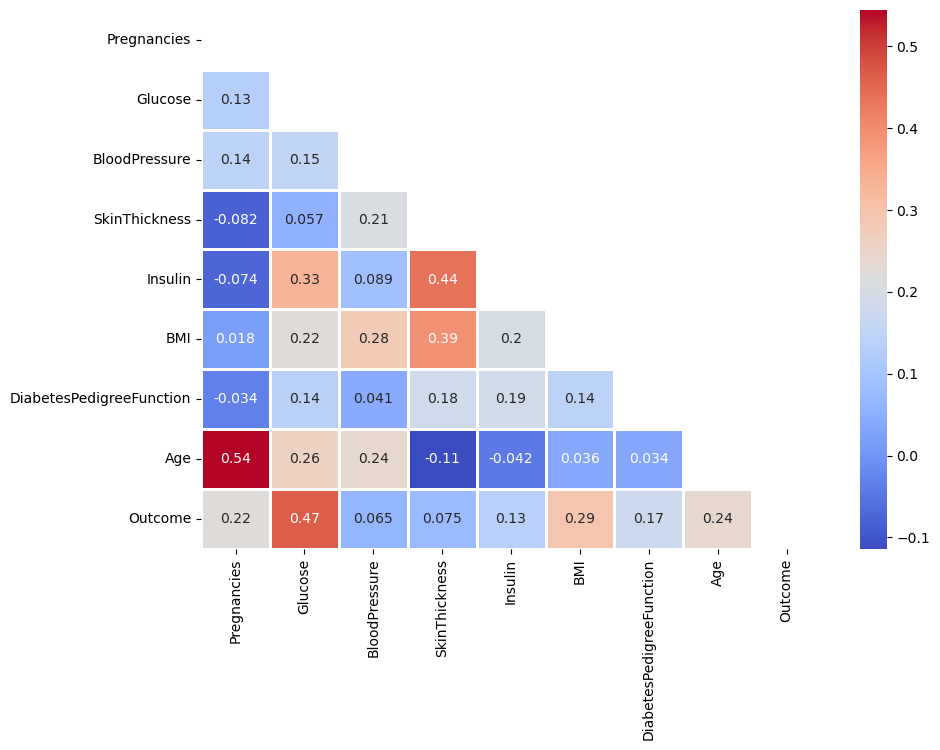

In [ ]:
plt.figure(figsize=(10, 7))
matrix = np.triu(diabetes_prediction.corr())
sns.heatmap(diabetes_prediction.corr(), annot=True, linewidth=.8, mask=matrix, cmap="coolwarm")

## Data Preprocessing


In [ ]:
numeric_columns = ['Insulin', 'DiabetesPedigreeFunction',]

for column_name in numeric_columns:
    #calculate the first quartile (Q1) and third quartile (Q3) for the current numeric 
    #The interpolation='midpoint' argument specifies that the median of two surrounding data points should be used if the percentile falls between two data points.
    Q1 = np.percentile(diabetes_prediction[column_name], 25, interpolation='midpoint')
    Q3 = np.percentile(diabetes_prediction[column_name], 75, interpolation='midpoint')

# calculate the Interquartile Range (IQR) for the current column.
    IQR = Q3 - Q1
#calculate the lower and upper limits for detecting outliers based on the IQR    
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    # Find outliers in the specified column in the whole dataset
    outliers = diabetes_prediction[(diabetes_prediction[column_name] < low_lim) | (diabetes_prediction[column_name] > up_lim)][column_name]

    # Replace outliers with the lower or upper limit
    diabetes_prediction[column_name] = np.where(diabetes_prediction[column_name] < low_lim, low_lim, diabetes_prediction[column_name])
    diabetes_prediction[column_name] = np.where(diabetes_prediction[column_name] > up_lim, up_lim, diabetes_prediction[column_name])

In [ ]:
#split dataset from Outcome
X = diabetes_prediction.drop(columns= 'Outcome', axis=1)
Y = diabetes_prediction['Outcome']


In [ ]:
#Splitting data for the training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20)

## ML Models


**Logistic Regression**

In [ ]:
log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)
log_reg.fit(X_train, Y_train)

LogisticRegression(C=1, max_iter=200, solver='liblinear')

In [ ]:
#Function that get the model,input,target and name then make confution matrix and calculate accuracy
def plot(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('Confusion Matrix'.format(name))

Accuracy: 77.36%
Accuracy: 79.22%


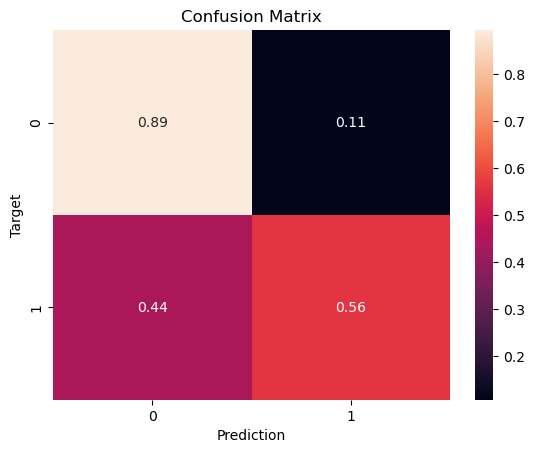

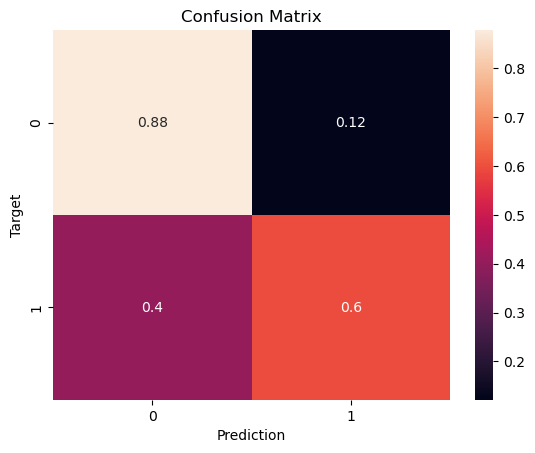

In [ ]:
# plot on the training data
train_predictions = plot(log_reg, X_train, Y_train, 'Train')

#plot on the validation data
val_predictions = plot(log_reg, X_test, Y_test, 'Validation')

**SVC (support vector classifier)**

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')

# Fit the SVM model to the training data
svm_model.fit(X_train, Y_train)

# Make predictions on the training data
y_train_pred = svm_model.predict(X_train)

# Make predictions on the validation data
y_val_pred = svm_model.predict(X_val)

# Calculate the training accuracy
train_accuracy = accuracy_score(Y_train, y_train_pred)

# Calculate the validation accuracy
val_accuracy = accuracy_score(Y_val, y_val_pred)

print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100))



Training Accuracy: 77.85%
Validation Accuracy: 77.27%


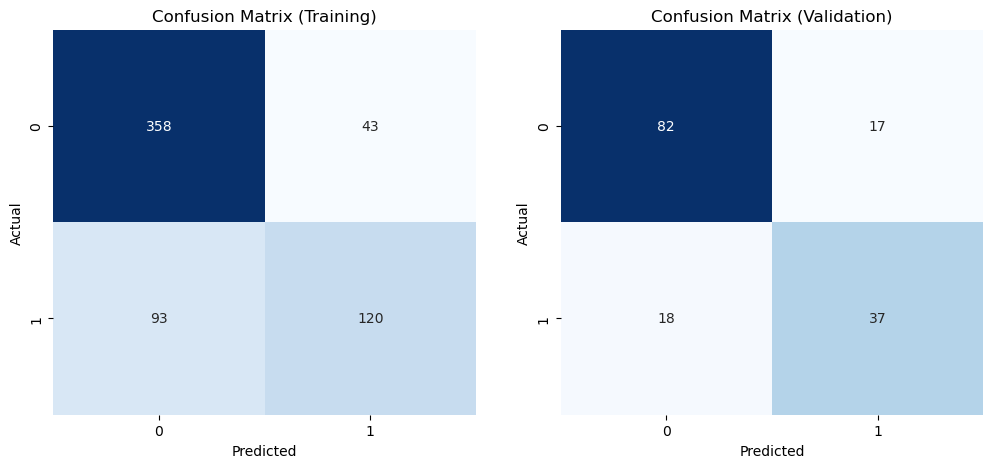

In [ ]:
# Create confusion matrices
train_confusion = confusion_matrix(Y_train, y_train_pred)
val_confusion = confusion_matrix(Y_val, y_val_pred)

# Plot the confusion matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

**Random Forest**

In [ ]:
model_3 = RandomForestClassifier(n_jobs =-1, random_state = 42)
model_3.fit(X_train,Y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model_3.score(X_train,Y_train)

1.0

Accuracy: 100.00%
Accuracy: 96.75%


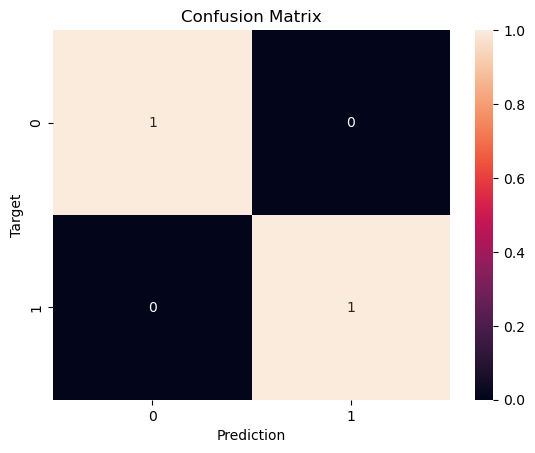

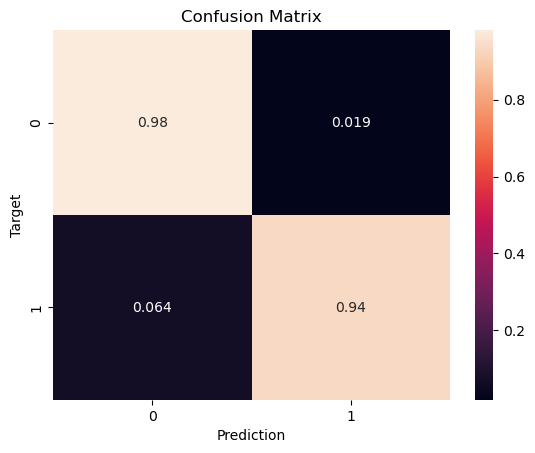

In [ ]:
# Predict and plot on the training data
train_preds = plot(model_3, X_train, Y_train, 'Train')

# Predict and plot on the validation data
val_preds = plot(model_3, X_test, Y_test, 'Validation')

<div style=";font-size:15px;font-family:Georgia;border-style: solid;border-color: #2FAFCF;border-width:3px;padding:10px;margin: 1px;color:#2FAFCF;overflow:hidden"> 
<b>Evaluate: Random Forest Model: Before Tunning</b><br>
Training Accuracy - 100.00% <br>
Validation Accuracy - 96.75%<br>
<b>The tree model exhibits overfitting behavior as it attains flawless accuracy on the training dataset while demonstrating reduced accuracy on the validation dataset.</b></div>

**Hyperparameter Tuning of Random Forest**

In [ ]:
param_grid = {
    'n_estimators': [10, 20, 30],  # Adjust the number of trees in the forest
    'max_depth': [10, 20, 30],  # Adjust the maximum depth of each tree
    'min_samples_split': [2, 5, 10, 15, 20],  # Adjust the minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6, 8]  # Adjust the minimum samples required in a leaf node
}

model = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, Y_train)
best_model = grid_search.best_estimator_

best_model.fit(X_train, Y_train)

# Evaluate the model on the training and validation data
train_accuracy = best_model.score(X_train, Y_train)
val_accuracy = best_model.score(X_test, Y_test)

# Print the results
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100))


Training Accuracy: 89.25%
Validation Accuracy: 86.36%


**Decision Tree**

In [ ]:
# Create the Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
decision_tree_model.fit(X_train, Y_train)

# Evaluate the model on the training and validation data
train_accuracy = decision_tree_model.score(X_train, Y_train)
val_accuracy = decision_tree_model.score(X_test, Y_test)

# Print the results
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100))

Training Accuracy: 100.00%
Validation Accuracy: 95.45%


<div style=";font-size:15px;font-family:Georgia;border-style: solid;border-color: #2FAFCF;border-width:3px;padding:10px;margin: 1px;color:#2FAFCF;overflow:hidden">
<b>Decision Tree: Before Tunning </b><br>
Training Accuracy: 100% <br>
Validation Accuracy: 95.45%<br>
<b>The tree model exhibits overfitting behavior as it attains flawless accuracy on the training dataset while demonstrating reduced accuracy on the validation dataset.</b></div>

**Hyperparameter Tuning Of Decision Tree**

In [ ]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 3, 5, 7],
    'criterion': ['gini', 'entropy']  # Add criterion hyperparameter
}

# Create the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best estimator with tuned hyperparameters
best_model = grid_search.best_estimator_

# Fit the final model to the training data
best_model.fit(X_train, Y_train)

# Evaluate the final model on the training and validation data
train_accuracy = best_model.score(X_train, Y_train)
val_accuracy = best_model.score(X_test, Y_test)

# Print the results
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100)) 

Training Accuracy: 82.25%
Validation Accuracy: 84.42%


<div style=";font-size:15px;font-family:Georgia;border-style: solid;border-color: #2FAFCF;border-width:3px;padding:10px;margin: 1px;color:#2FAFCF;overflow:hidden"> 
<b>Evaluate: Decision Tree Model </b><br>
Training Accuracy - 82.25% <br>
Validation Accuracy - 84.42%<br>
<b>It has reduced overfitting compared to the initial model.</b></div>

## END